In [2]:
import sys
sys.path.append('../utilities')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Developer's code
%load_ext autoreload
%autoreload 2

In [4]:
# Load in the data
soccer_data = pd.read_csv("sample_inputs/soccer.csv")
soccer_data.head()

,player_api_id,player_name,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,fix_vision,fix_penalties,fix_marking,fix_standing_tackle,fix_sliding_tackle,fix_gk_diving,fix_gk_handling,fix_gk_kicking,fix_gk_positioning,fix_gk_reflexes
0,2625,"Patryk Rachwal,18",60.5,61.0,50.0,47.0,46.0,53.0,38.0,56.0,...,4.060606,15.060606,12.060606,12.060606,3.060606,-38.939394,-39.939394,-44.939394,-42.939394,-42.939394
1,2752,Diego Mainz,70.0,71.0,36.0,37.0,72.0,55.0,20.0,45.0,...,8.030303,-8.969697,30.030303,29.030303,21.030303,-32.969697,-37.969697,-36.969697,-34.969697,-28.969697
2,2768,Jose Dorado,72.0,73.0,42.0,42.0,69.0,68.0,28.0,39.0,...,9.090909,-22.909091,26.090909,25.090909,33.090909,-36.909091,-33.909091,-35.909091,-34.909091,-38.909091
3,2770,Ignacio Gonzalez,71.0,72.0,62.0,68.0,71.0,72.0,69.0,71.0,...,18.424242,14.424242,-21.575758,-11.575758,-29.575758,-42.575758,-41.575758,-48.575758,-40.575758,-39.575758
4,2790,Alberto Rey,71.0,76.0,71.0,37.0,55.0,68.0,43.0,64.0,...,2.242424,-3.757576,19.242424,19.242424,11.242424,-49.757576,-36.757576,13.242424,-36.757576,-36.757576


Starting PCA algorithm
Saving PCA results


{'data':        pca_dim_0  pca_dim_1  pca_dim_2  pca_dim_3  pca_dim_4  pca_dim_5  \
 0      -0.591191  -1.616196  -0.806173  -0.882095   1.923255   0.689022   
 1       3.666860  -4.814296   2.566789   0.223932  -1.771126   0.482459   
 2       3.393693  -3.355063  -0.514446  -0.592445  -2.106477   1.370847   
 3      -4.054611   1.081673   3.487485  -1.914158   0.459679   0.623613   
 4       1.270287  -1.733558  -0.695637  -2.257533   0.391680  -1.017427   
 ...          ...        ...        ...        ...        ...        ...   
 10577  -0.763612   0.878333  -1.250822  -0.987161   0.379750   1.467251   
 10578   1.170607  -0.376448  -4.219088   0.379794   1.061204  -0.254980   
 10579   2.682293  -1.986834  -1.461432   0.996014   1.560480   0.012231   
 10580  -2.447392   3.015797  -0.110979  -0.121022  -0.858198   1.925713   
 10581   0.670819  -1.628928  -0.488621  -0.828169   1.254910   1.230818   
 
        pca_dim_6  pca_dim_7  pca_dim_8  pca_dim_9  ...  fix_vision  \
 0     

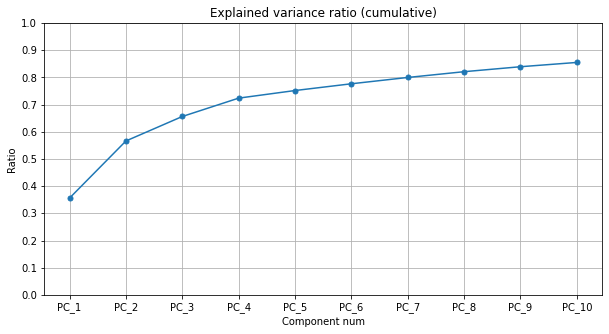

In [12]:
from dimensionality_reduction import SyntheticVariableReduction

variables = [
    'fix_crossing', 'fix_short_passing', 'fix_finishing', 'fix_volleys', 'fix_heading_accuracy', 'fix_dribbling', 'fix_curve', 'fix_free_kick_accuracy',
    'fix_long_passing', 'fix_ball_control', 'fix_acceleration', 'fix_sprint_speed', 'fix_agility', 'fix_reactions', 'fix_balance', 'fix_shot_power', 'fix_jumping',
    'fix_stamina', 'fix_strength', 'fix_long_shots', 'fix_aggression', 'fix_interceptions', 'fix_positioning', 'fix_vision', 'fix_penalties', 'fix_marking',
    'fix_standing_tackle', 'fix_sliding_tackle', 'fix_gk_diving', 'fix_gk_handling', 'fix_gk_kicking', 'fix_gk_positioning', 'fix_gk_reflexes'
]

    
output = SyntheticVariableReduction.pca(
    data=soccer_data,
    variables=variables,
    n_components = 10,
    
    standardize_vars=True, 
    generate_charts=True,
    save_results_to_excel=True
)

output

In [8]:
# Look at the variance explained
output['explained_variance']

,0,PCA_dim
0,0.356242,PC_1
1,0.566318,PC_2
2,0.656364,PC_3
3,0.723938,PC_4
4,0.751871,PC_5
5,0.776741,PC_6
6,0.799964,PC_7
7,0.821198,PC_8
8,0.839459,PC_9
9,0.855241,PC_10


In [9]:
# Look at the output with principal components
output["data"].head()

,pca_dim_0,pca_dim_1,pca_dim_2,pca_dim_3,pca_dim_4,pca_dim_5,pca_dim_6,pca_dim_7,pca_dim_8,pca_dim_9,...,fix_vision,fix_penalties,fix_marking,fix_standing_tackle,fix_sliding_tackle,fix_gk_diving,fix_gk_handling,fix_gk_kicking,fix_gk_positioning,fix_gk_reflexes
0,-0.591191,-1.616196,-0.806170,-0.882114,1.921314,0.687966,2.102249,0.457361,-0.861903,0.860798,...,4.060606,15.060606,12.060606,12.060606,3.060606,-38.939394,-39.939394,-44.939394,-42.939394,-42.939394
1,3.666860,-4.814296,2.566775,0.223986,-1.774482,0.479371,-0.264540,0.842347,-0.127607,0.520457,...,8.030303,-8.969697,30.030303,29.030303,21.030303,-32.969697,-37.969697,-36.969697,-34.969697,-28.969697
2,3.393693,-3.355063,-0.514458,-0.592357,-2.106640,1.368056,-2.120884,-0.192683,0.870196,-0.499736,...,9.090909,-22.909091,26.090909,25.090909,33.090909,-36.909091,-33.909091,-35.909091,-34.909091,-38.909091
3,-4.054611,1.081673,3.487485,-1.914134,0.460951,0.623917,-1.522541,-0.018458,0.075270,-0.354305,...,18.424242,14.424242,-21.575758,-11.575758,-29.575758,-42.575758,-41.575758,-48.575758,-40.575758,-39.575758
4,1.270287,-1.733558,-0.695640,-2.257519,0.393046,-1.017311,0.166344,1.006441,1.675548,-0.847010,...,2.242424,-3.757576,19.242424,19.242424,11.242424,-49.757576,-36.757576,13.242424,-36.757576,-36.757576


In [10]:
output["explained_variance"]

,0,PCA_dim
0,0.356242,PC_1
1,0.566318,PC_2
2,0.656364,PC_3
3,0.723938,PC_4
4,0.751871,PC_5
5,0.776741,PC_6
6,0.799964,PC_7
7,0.821198,PC_8
8,0.839459,PC_9
9,0.855241,PC_10
